## **Visualizing the optimization process**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Step 1: Prepare CIFAR-10 dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Step 2: Define the CNN Model
class CNN_Model(nn.Module):
    def __init__(self):
        super(CNN_Model, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 8 * 8, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Training process and weight collection
def train_and_collect_weights(model, optimizer, criterion, n_epochs=30, record_interval=3):
    model.train()
    gradient_norms = []
    weights_collected = []
    loss_history = []

    for epoch in range(n_epochs):
        running_loss = 0.0

        for inputs, labels in trainloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()

            # Collect gradient norms
            total_norm = 0.0
            for param in model.parameters():
                if param.grad is not None:
                    param_norm = param.grad.data.norm(2)
                    total_norm += param_norm.item() ** 2
            total_norm = total_norm ** 0.5
            gradient_norms.append(total_norm)

            optimizer.step()
            running_loss += loss.item()

        # Record weights and loss
        if (epoch + 1) % record_interval == 0:
            weights_collected.append({name: param.data.clone().cpu().numpy().flatten() for name, param in model.named_parameters()})
            loss_history.append(running_loss / len(trainloader))

        print(f"Epoch [{epoch + 1}/{n_epochs}], Loss: {running_loss / len(trainloader):.4f}")

    return gradient_norms, weights_collected, loss_history

# Train the model 8 times and collect data
n_train_runs = 8
all_weights_collected = []
all_gradient_norms = []
all_loss_history = []

for run in range(n_train_runs):
    print(f"Training run {run + 1}/{n_train_runs}")
    model = CNN_Model()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()
    gradient_norms, weights_collected, loss_history = train_and_collect_weights(model, optimizer, criterion, n_epochs=15, record_interval=3)
    all_weights_collected.extend(weights_collected)
    all_gradient_norms.extend(gradient_norms)
    all_loss_history.append(loss_history)

# Flatten all collected weights into a single matrix
all_weights_matrix = np.vstack(all_weights_collected)

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
weights_pca = pca.fit_transform(all_weights_matrix)

# Plot the results
plt.figure(figsize=(14, 6))

# Plot loss over epochs
plt.subplot(1, 2, 1)
average_loss_history = np.mean(all_loss_history, axis=0)
plt.plot(range(1, len(average_loss_history) + 1), average_loss_history, label="Average Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.legend()

# Plot gradient norm over time
plt.subplot(1, 2, 2)
plt.plot(range(1, len(all_gradient_norms) + 1), all_gradient_norms, label="Gradient Norm")
plt.xlabel("Epochs")
plt.ylabel("Gradient Norm")
plt.title("Gradient Norm during Training")
plt.legend()

plt.tight_layout()
plt.show()

# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(weights_pca[:, 0], weights_pca[:, 1], s=10, alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Collected Weights')
plt.grid(True)
plt.show()


100%|██████████| 170498071/170498071 [00:10<00:00, 16271279.32it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Training run 1/8
Epoch [1/15], Loss: 1.4635
Epoch [2/15], Loss: 1.1202
Epoch [3/15], Loss: 0.9757
Epoch [4/15], Loss: 0.8867
Epoch [5/15], Loss: 0.8208
Epoch [6/15], Loss: 0.7718
Epoch [7/15], Loss: 0.7257
Epoch [8/15], Loss: 0.6893
Epoch [9/15], Loss: 0.6515
Epoch [10/15], Loss: 0.6173
Epoch [11/15], Loss: 0.5819
Epoch [12/15], Loss: 0.5511
Epoch [13/15], Loss: 0.5233
Epoch [14/15], Loss: 0.4962
Epoch [15/15], Loss: 0.4741
Training run 2/8
Epoch [1/15], Loss: 1.4738
Epoch [2/15], Loss: 1.1475
Epoch [3/15], Loss: 1.0023
Epoch [4/15], Loss: 0.9061
Epoch [5/15], Loss: 0.8375
Epoch [6/15], Loss: 0.7799
Epoch [7/15], Loss: 0.7265
Epoch [8/15], Loss: 0.6817
Epoch [9/15], Loss: 0.6414
Epoch [10/15], Loss: 0.6065
Epoch [11/15], Loss: 0.5673
Epoch [12/15], Loss: 0.5327
Epoch [13/15], Loss: 0.5017
Epoch [14/15], Loss: 0.4698
Epoch [15/15], Loss: 0.4399
Training run 3/8
Epoch [1/15], Loss: 1.4708
Epoch [2/15

TypeError: float() argument must be a string or a real number, not 'dict'

Files already downloaded and verified
Files already downloaded and verified
Training run 1/8
Epoch [1/30], Loss: 1.4863
Epoch [2/30], Loss: 1.1549
Epoch [3/30], Loss: 1.0030
Epoch [4/30], Loss: 0.9045
Epoch [5/30], Loss: 0.8332
Epoch [6/30], Loss: 0.7786
Epoch [7/30], Loss: 0.7306
Epoch [8/30], Loss: 0.6925
Epoch [9/30], Loss: 0.6543
Epoch [10/30], Loss: 0.6186
Epoch [11/30], Loss: 0.5852
Epoch [12/30], Loss: 0.5555
Epoch [13/30], Loss: 0.5261
Epoch [14/30], Loss: 0.5004
Epoch [15/30], Loss: 0.4712
Epoch [16/30], Loss: 0.4457
Epoch [17/30], Loss: 0.4227
Epoch [18/30], Loss: 0.4010
Epoch [19/30], Loss: 0.3781
Epoch [20/30], Loss: 0.3558
Epoch [21/30], Loss: 0.3367
Epoch [22/30], Loss: 0.3158
Epoch [23/30], Loss: 0.2949
Epoch [24/30], Loss: 0.2788
Epoch [25/30], Loss: 0.2646
Epoch [26/30], Loss: 0.2492
Epoch [27/30], Loss: 0.2334
Epoch [28/30], Loss: 0.2212
Epoch [29/30], Loss: 0.2062
Epoch [30/30], Loss: 0.1966
Training run 2/8
Epoch [1/30], Loss: 1.4898
Epoch [2/30], Loss: 1.1502
Epoch

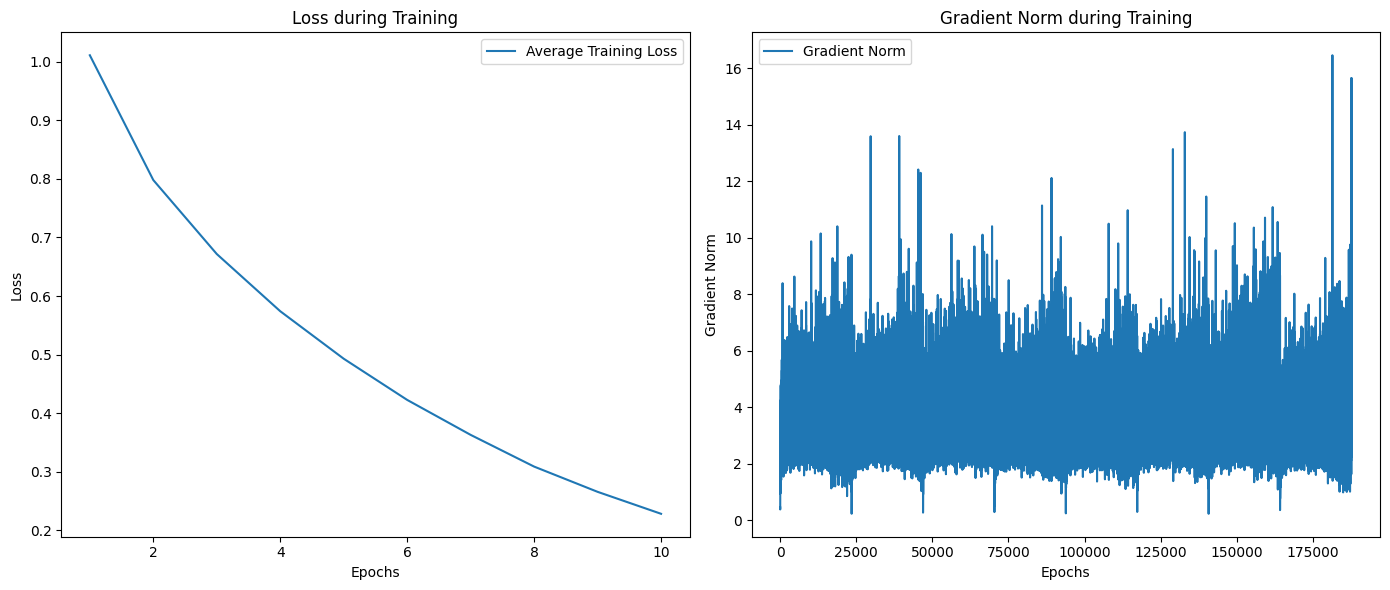

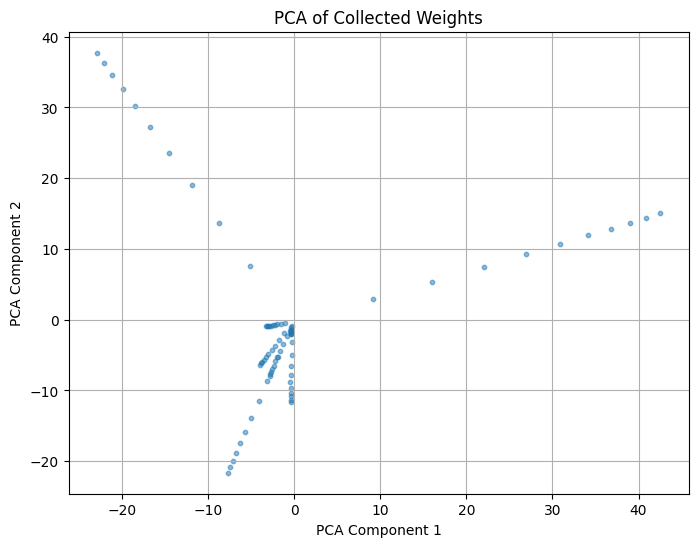

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Step 1: Prepare CIFAR-10 dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Step 2: Define the CNN Model
class CNN_Model(nn.Module):
    def __init__(self):
        super(CNN_Model, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 8 * 8, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Flatten weights into a 1D vector
def get_flattened_weights(model):
    return np.concatenate([param.data.cpu().numpy().flatten() for param in model.parameters()])

# Training process and weight collection
def train_and_collect_weights(model, optimizer, criterion, n_epochs=30, record_interval=3):
    model.train()
    gradient_norms = []
    weights_collected = []
    loss_history = []

    for epoch in range(n_epochs):
        running_loss = 0.0

        for inputs, labels in trainloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()

            # Collect gradient norms
            total_norm = 0.0
            for param in model.parameters():
                if param.grad is not None:
                    param_norm = param.grad.data.norm(2)
                    total_norm += param_norm.item() ** 2
            total_norm = total_norm ** 0.5
            gradient_norms.append(total_norm)

            optimizer.step()
            running_loss += loss.item()

        # Record flattened weights and loss
        if (epoch + 1) % record_interval == 0:
            weights_collected.append(get_flattened_weights(model))
            loss_history.append(running_loss / len(trainloader))

        print(f"Epoch [{epoch + 1}/{n_epochs}], Loss: {running_loss / len(trainloader):.4f}")

    return gradient_norms, weights_collected, loss_history

# Train the model 8 times and collect data
n_train_runs = 8
all_weights_collected = []
all_gradient_norms = []
all_loss_history = []

for run in range(n_train_runs):
    print(f"Training run {run + 1}/{n_train_runs}")
    model = CNN_Model()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()
    gradient_norms, weights_collected, loss_history = train_and_collect_weights(model, optimizer, criterion, n_epochs=30, record_interval=3)
    all_weights_collected.extend(weights_collected)
    all_gradient_norms.extend(gradient_norms)
    all_loss_history.append(loss_history)

# Flatten all collected weights into a single matrix
all_weights_matrix = np.vstack(all_weights_collected)

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
weights_pca = pca.fit_transform(all_weights_matrix)

# Plot the results
plt.figure(figsize=(14, 6))

# Plot loss over epochs
plt.subplot(1, 2, 1)
average_loss_history = np.mean(all_loss_history, axis=0)
plt.plot(range(1, len(average_loss_history) + 1), average_loss_history, label="Average Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.legend()

# Plot gradient norm over time
plt.subplot(1, 2, 2)
plt.plot(range(1, len(all_gradient_norms) + 1), all_gradient_norms, label="Gradient Norm")
plt.xlabel("Epochs")
plt.ylabel("Gradient Norm")
plt.title("Gradient Norm during Training")
plt.legend()

plt.tight_layout()
plt.show()

# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(weights_pca[:, 0], weights_pca[:, 1], s=10, alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Collected Weights')
plt.grid(True)
plt.show()


## What happens when gradient is almost zero?

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/20, Loss: 1.4942, Gradient Norm: 4885.4831, Minimal Ratio: 0.0340
Epoch 2/20, Loss: 1.1674, Gradient Norm: 5635.4373, Minimal Ratio: 0.0314
Epoch 3/20, Loss: 1.0221, Gradient Norm: 5967.9960, Minimal Ratio: 0.0303
Epoch 4/20, Loss: 0.9249, Gradient Norm: 6212.0105, Minimal Ratio: 0.0299
Epoch 5/20, Loss: 0.8601, Gradient Norm: 6262.6249, Minimal Ratio: 0.0282
Epoch 6/20, Loss: 0.8085, Gradient Norm: 6338.1211, Minimal Ratio: 0.0281
Epoch 7/20, Loss: 0.7645, Gradient Norm: 6308.8094, Minimal Ratio: 0.0277
Epoch 8/20, Loss: 0.7264, Gradient Norm: 6361.7048, Minimal Ratio: 0.0271
Epoch 9/20, Loss: 0.6910, Gradient Norm: 6390.3923, Minimal Ratio: 0.0269
Epoch 10/20, Loss: 0.6621, Gradient Norm: 6491.8903, Minimal Ratio: 0.0270
Epoch 11/20, Loss: 0.6344, Gradient Norm: 6445.5971, Minimal Ratio: 0.0267
Epoch 12/20, Loss: 0.6030, Gradient Norm: 6481.5647, Minimal Ratio: 0.0264
Epoch 13/20, Loss: 0.5780, Gradie

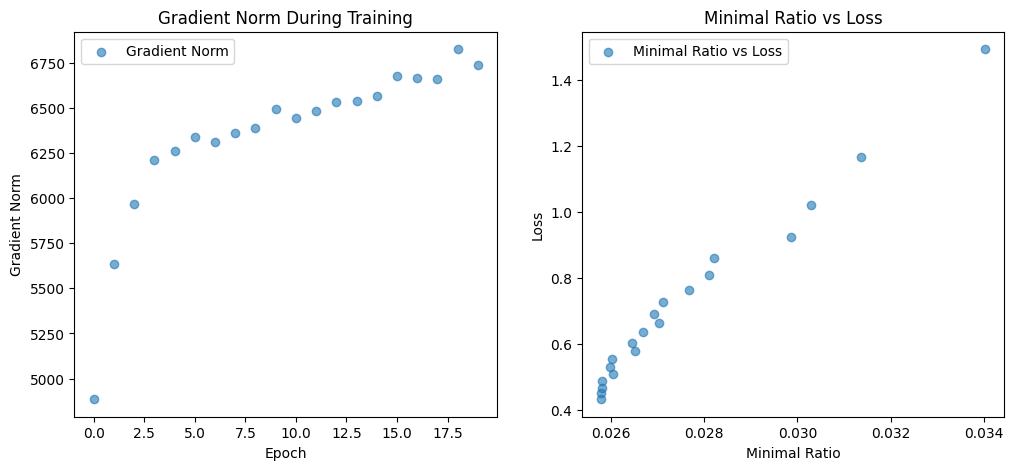

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

# Step 1: CIFAR-10 Dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# CIFAR-10 train and test datasets
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Step 2: Define Simple CNN Model (Small Network for Simplicity)
class SmallCNN(nn.Module):
    def __init__(self):
        super(SmallCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)  # 3 input channels (RGB), 16 output channels
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)  # 16 input channels, 32 output channels
        self.pool = nn.MaxPool2d(2, 2)  # Max pooling
        self.fc1 = nn.Linear(32 * 8 * 8, 64)  # Fully connected layer
        self.fc2 = nn.Linear(64, 10)  # Output layer (10 classes for CIFAR-10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))  # Conv1 -> ReLU -> MaxPool
        x = self.pool(torch.relu(self.conv2(x)))  # Conv2 -> ReLU -> MaxPool
        x = x.view(-1, 32 * 8 * 8)  # Flatten the output from the conv layers
        x = torch.relu(self.fc1(x))  # Fully connected layer
        x = self.fc2(x)  # Output layer
        return x

# Step 3: Set Up Training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SmallCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 4: Function to Track Minimal Ratio
def compute_minimal_ratio(model, threshold=1e-3):
    with torch.no_grad():
        total_weights = 0
        minimal_weights = 0
        for param in model.parameters():
            total_weights += param.numel()
            minimal_weights += (torch.abs(param) < threshold).sum().item()
        return minimal_weights / total_weights

# Step 5: Training Loop with Gradient Norm Tracking
epochs = 20
losses = []
grad_norms = []
minimal_ratios = []

for epoch in range(epochs):
    running_loss = 0.0
    total_grad_norm = 0.0
    model.train()

    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()  # Zero the parameter gradients

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Accumulate loss
        running_loss += loss.item()

        # Compute gradient norm for all parameters
        for param in model.parameters():
            if param.grad is not None:
                total_grad_norm += param.grad.norm().item()

    # Average loss and gradient norm for the epoch
    avg_loss = running_loss / len(trainloader)
    losses.append(avg_loss)
    grad_norms.append(total_grad_norm)

    # Compute minimal ratio of the weights
    minimal_ratio = compute_minimal_ratio(model)
    minimal_ratios.append(minimal_ratio)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}, Gradient Norm: {total_grad_norm:.4f}, Minimal Ratio: {minimal_ratio:.4f}")

    # Early stop if gradient norm becomes very small
    if total_grad_norm < 1e-4:
        print("Gradient norm close to zero, stopping early.")
        break

# Step 6: Plot Results
# Plot gradient norm
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(range(len(grad_norms)), grad_norms, alpha=0.6, label='Gradient Norm')
plt.xlabel('Epoch')
plt.ylabel('Gradient Norm')
plt.title('Gradient Norm During Training')
plt.legend()

# Plot minimal ratio vs loss
plt.subplot(1, 2, 2)
plt.scatter(minimal_ratios, losses, alpha=0.6, label='Minimal Ratio vs Loss')
plt.xlabel('Minimal Ratio')
plt.ylabel('Loss')
plt.title('Minimal Ratio vs Loss')
plt.legend()

plt.show()
